**Project Proposal: Performance Analysis of Machine Learning Algorithms for Student Placement Prediction**

This project aims to delve into the performance analysis of various machine learning algorithms applied to student placement prediction. Using machine learning which offers powerful tools to analyze historical data and extract patterns that can forecast these outcomes with reasonable accuracy. The dataset used encompasses crucial parameters such as academic performance in secondary (SSC) and higher secondary (HSC) education, degree specialization, work experience, entrance test scores, and MBA performance, among others.

The selected dataset for this project is tailored to analyze and predict student placement outcomes in a business school context. Acquired from Kaggle.com, a reputable platform hosting diverse datasets, this dataset offers an extensive overview of student academic performance, work experience, and placement status. It includes key attributes such as gender, secondary and higher secondary education percentages, board of education, specialization in higher secondary education, undergraduate degree percentage and type, work experience, E-test scores, MBA specialization, MBA percentage, placement status, and salary offered. 

Organized in a CSV format, each row corresponds to an individual student, and the columns encompass both quantitative and categorical features. With 145 rows and 15 columns, the dataset allows for comprehensive analysis and predictive modeling of student placements. The data types include numerical values (e.g., percentages, salary) and categorical values (e.g., gender, specialization), reflecting the multifaceted aspects of student profiles and their placement outcomes. 

This dataset provides a valuable resource for exploring trends in student placements, examining the impact of various educational and experiential backgrounds on placement success, and identifying key factors that contribute to higher salary offers in the context of business school graduates.

The primary objective of this project is to evaluate and compare the performance of various machine learning algorithms in predicting whether a student will be placed based on the provided dataset. The algorithms considered include Decision Trees, k-Nearest Neighbors (kNN), Support Vector Classifier (SVC), and Random Forest. Each algorithm will be assessed based on its accuracy, precision, recall, and F1-score to determine the most effective model for student placement prediction using the status and salary fields 

1. Importing Libraries
- The code begins with importing necessary libraries for data manipulation, visualization, and machine learning:

In [21]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

2. Loading and Inspecting Data
- The dataset Placement_Data_Full_Class 2.csv is loaded into a Pandas DataFrame df.

In [22]:
#Loading and Inspecting Data
df= pd.read_csv("Placement_Data_Full_Class 2.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


3. Data Exploration
- Summarize statistics of numerical columns

In [23]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


- Information about the DataFrame, including data types and missing values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


- Displaying number of missing values in each column

In [25]:
# handling missing values 
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- Dropping 'salary' and 'sl_no' column as it's not needed

In [26]:
df.drop(columns=['salary'], inplace=True)

In [27]:
df.drop(columns=['sl_no'], inplace=True)

In [28]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


- Count unique values in each column

In [29]:
df.apply(lambda x: len(x.unique()))

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
dtype: int64

- Count of each unique value in 'status' column

In [30]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

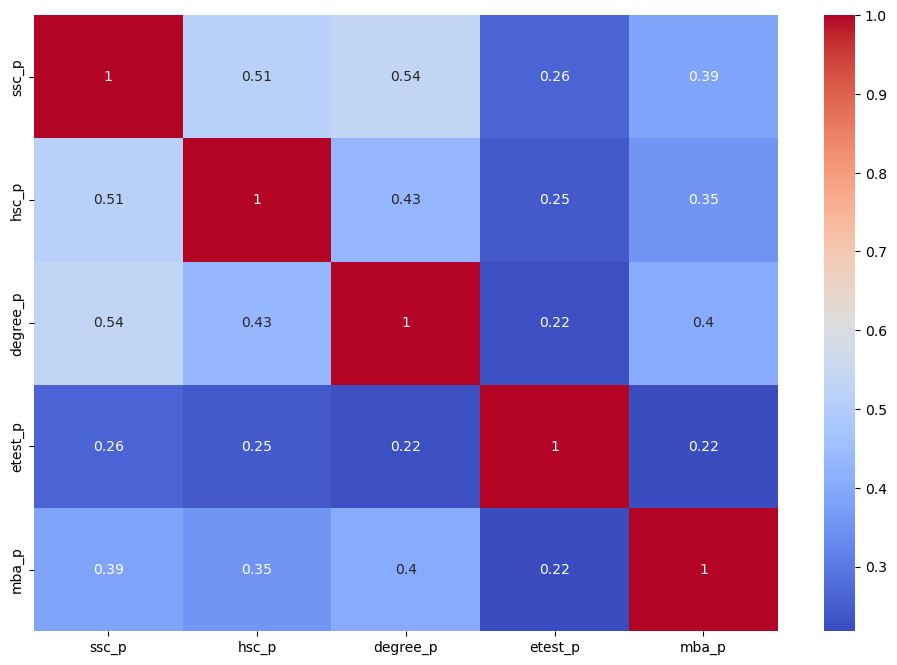

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix heatmap illustrates the relationships between various academic performance metrics:

Positive Correlations:

ssc_p and hsc_p (0.51): Students who perform well in secondary school tend to perform well in higher secondary school.
ssc_p and degree_p (0.54): Good secondary school performance is associated with good degree performance.
degree_p and mba_p (0.4): Degree performance correlates moderately with MBA performance.

Weaker Correlations:

etest_p (Employability Test Percentage) has weak correlations with all other variables, suggesting that employability test scores measure different skills compared to academic scores.

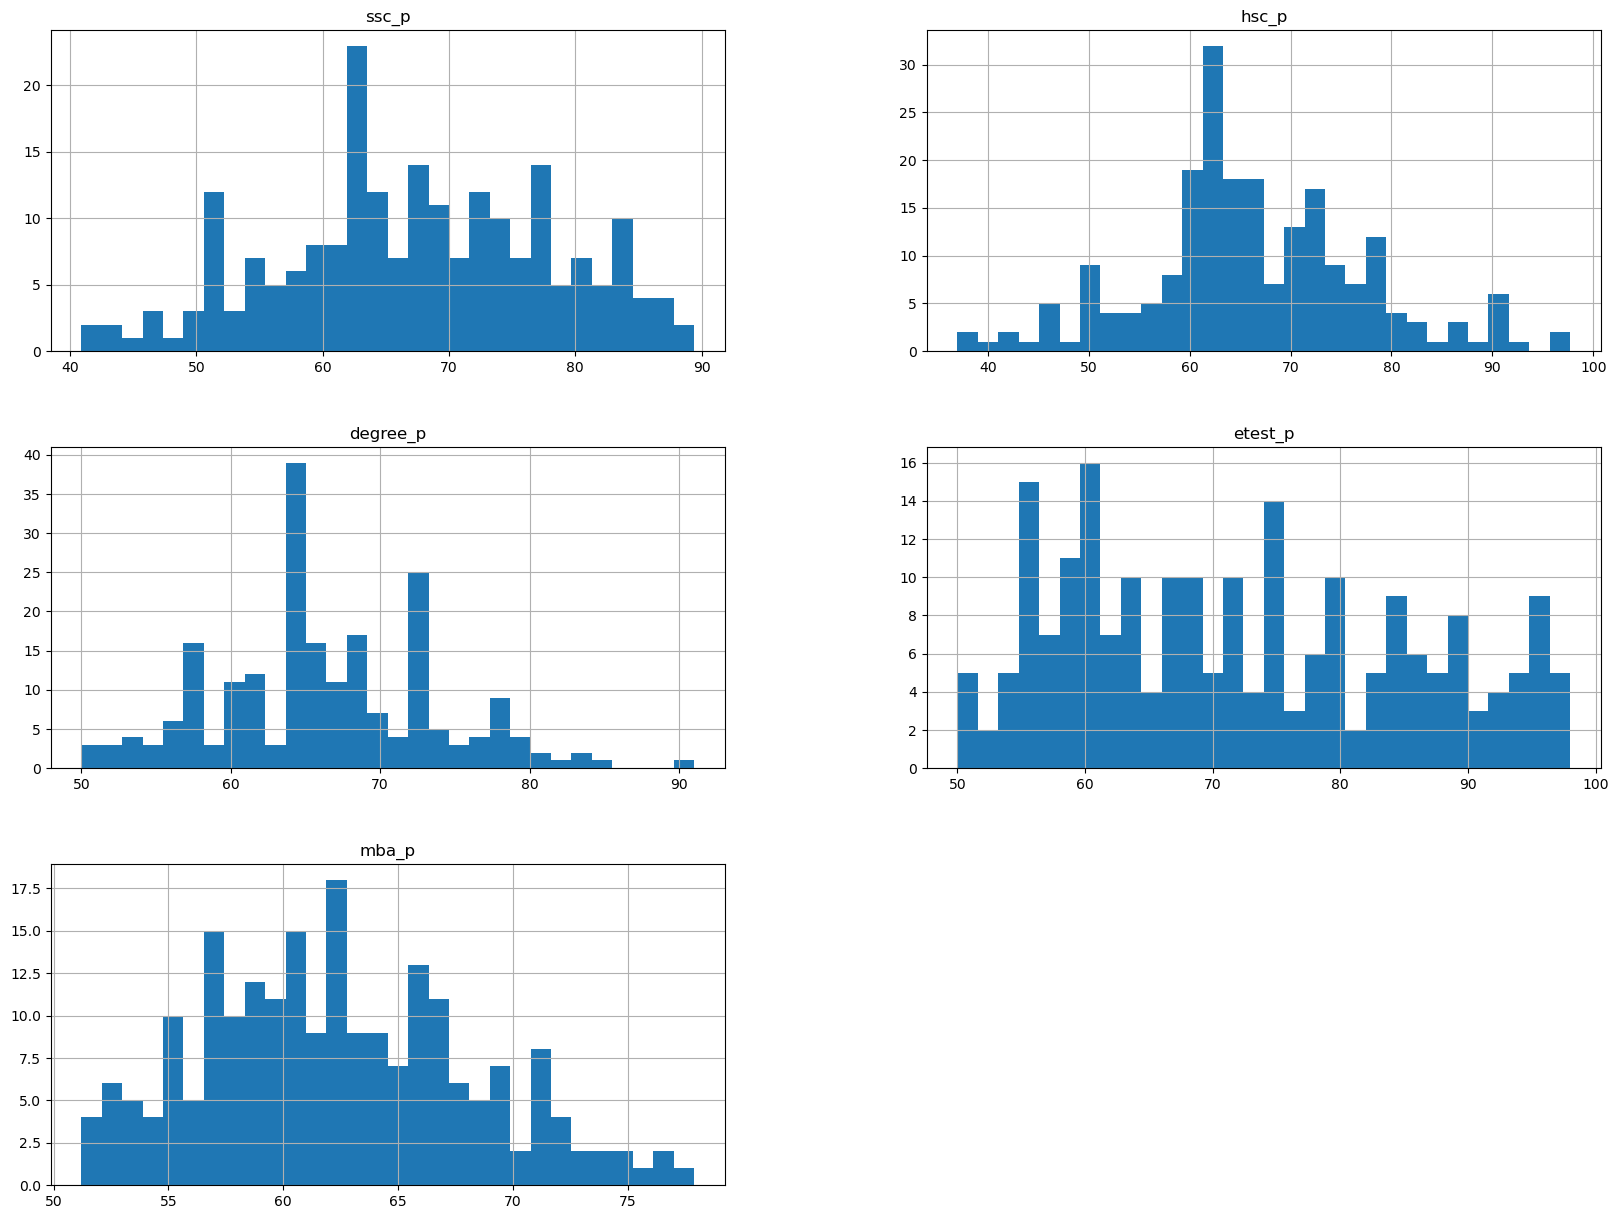

In [32]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

The histograms display the distributions of student percentages across different stages:

ssc_p (Secondary School Percentage):

Most students scored between 50% and 80%, with a peak around 60-65%.
hsc_p (Higher Secondary School Percentage):

Majority of scores are within the 55-65% range.
degree_p (Degree Percentage):

Scores are spread out with peaks around 60-70%.
etest_p (Employability Test Percentage):

Scores are evenly spread across the range, indicating diverse performance levels.
mba_p (MBA Percentage):

Most students scored between 50% and 75%, with a peak around 60-65%.

he similar distribution patterns in ssc_p, hsc_p, and mba_p indicate that students generally maintain consistent performance across these academic stages. The uniform distribution of etest_p reflects a wide range of performance levels in employability tests. The presence of multiple peaks in degree_p suggests a significant variability in students' degree performance.

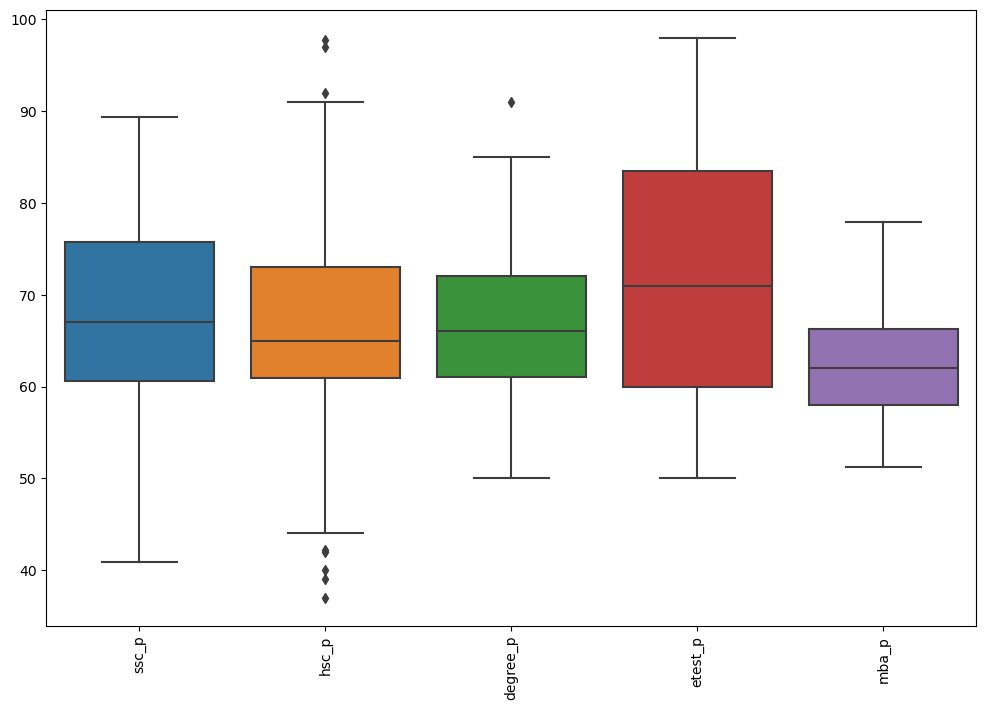

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

The boxplot shows the distribution of student percentages across various academic stages. The medians are relatively close, indicating consistent performance. etest_p has the widest range, showing diverse employability test scores, while mba_p has the least variability. Outliers in hsc_p and degree_p indicate a few significantly lower scores.

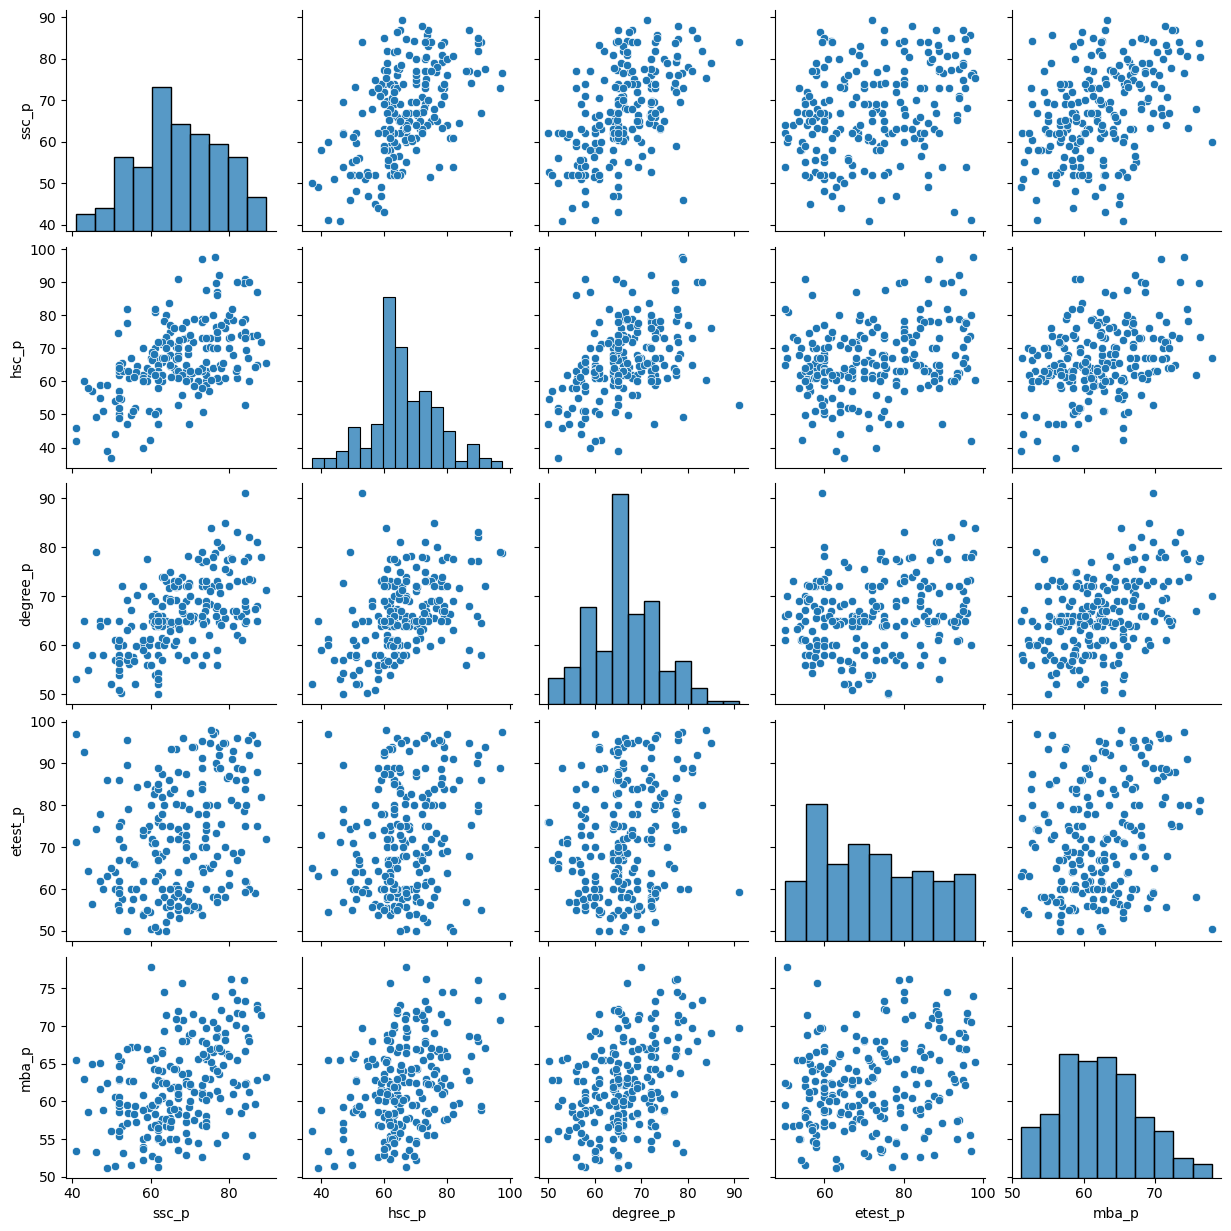

In [34]:
sns.pairplot(df)
plt.show()

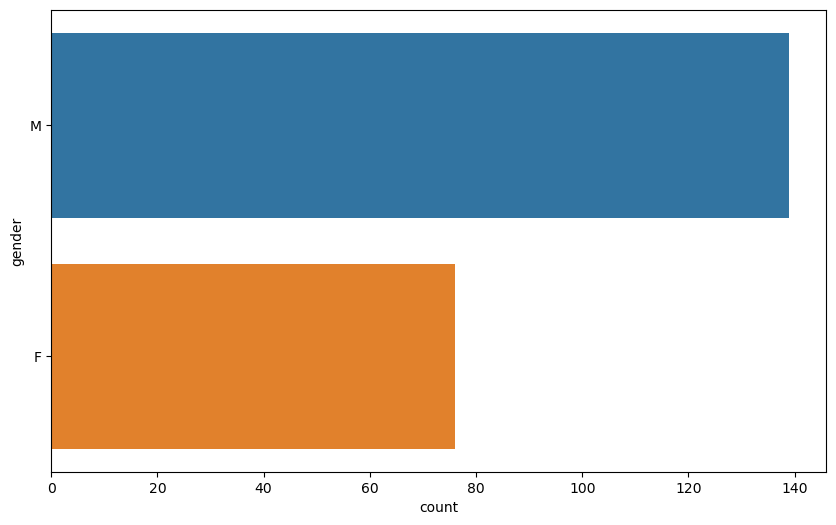

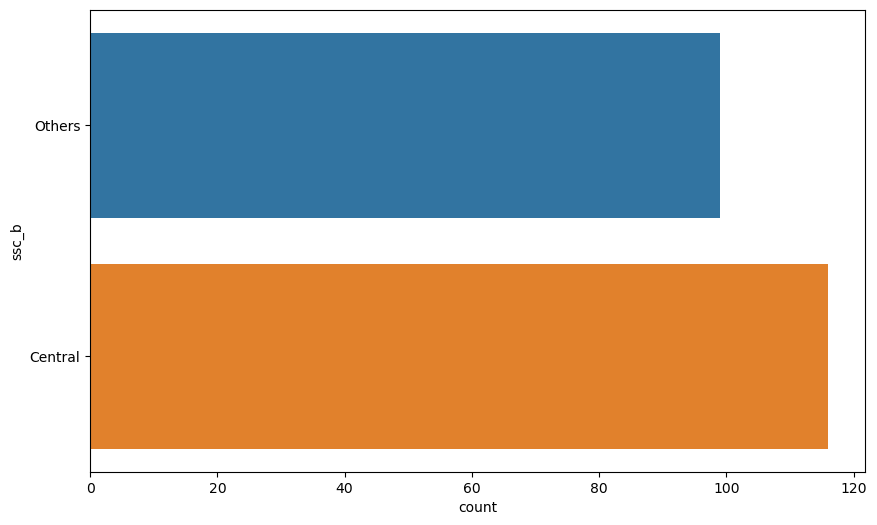

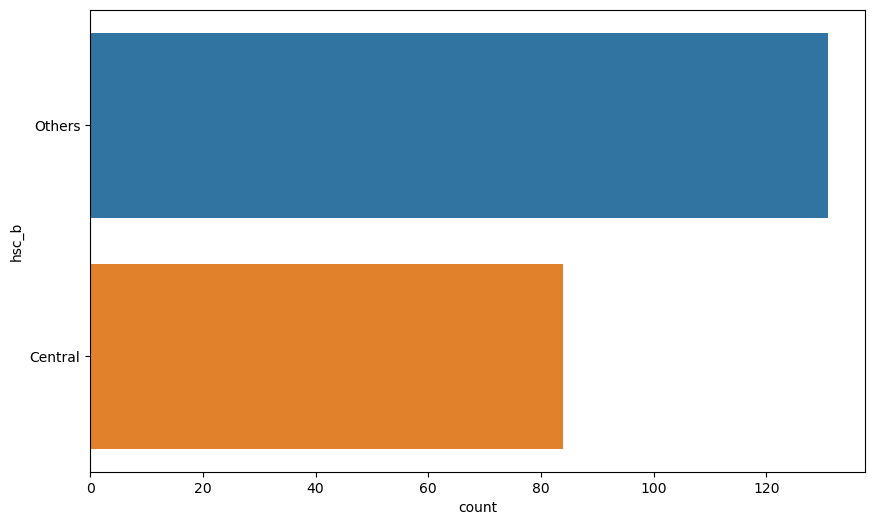

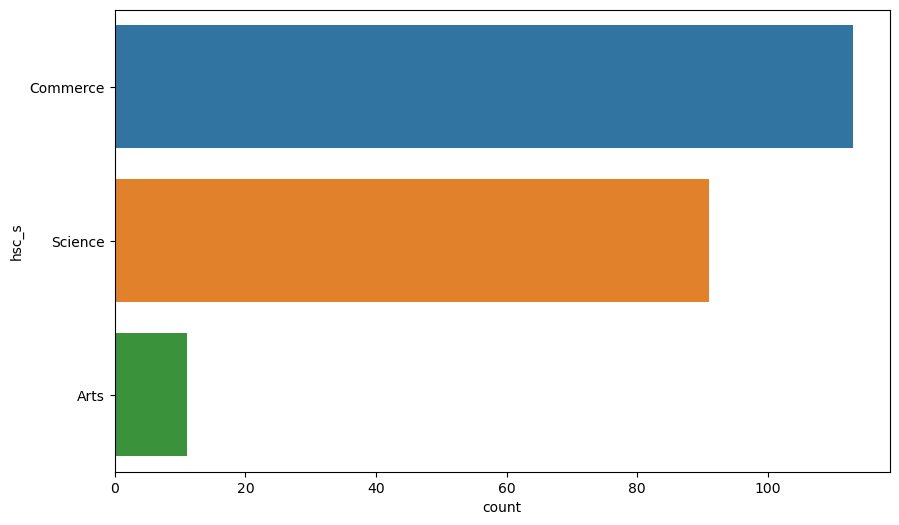

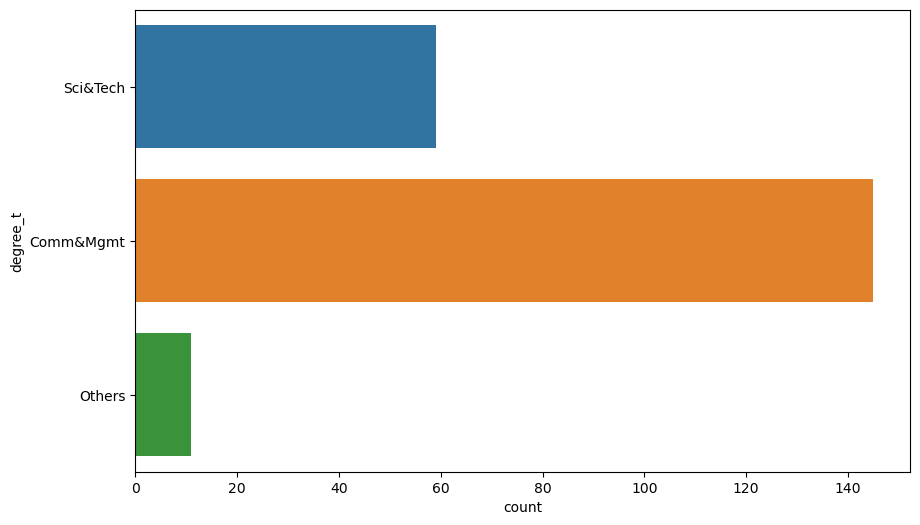

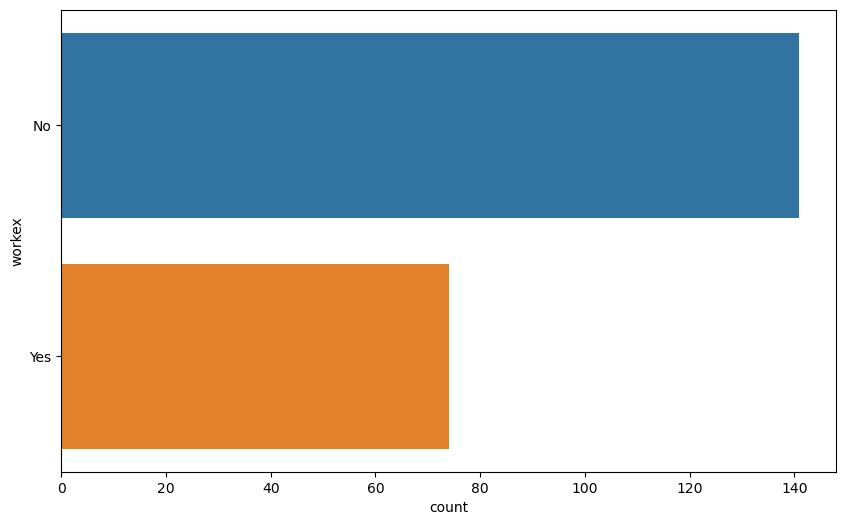

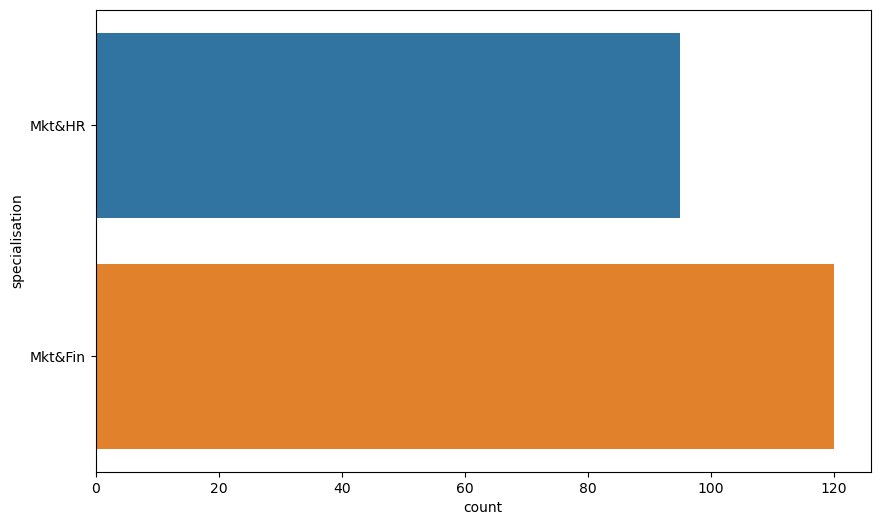

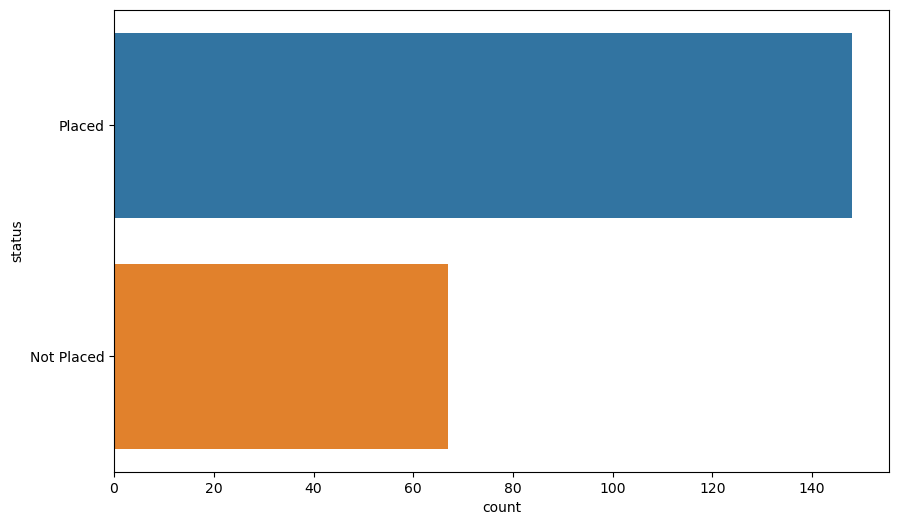

In [35]:
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.show()

Categorical variables are encoded into numerical values using LabelEncoder from scikit-learn. This step is essential for feeding the data into machine learning models, which require numerical input.

In [36]:
#Categorical Feature Encoding
from sklearn import preprocessing #encode string values into numerical values
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['ssc_b']= label_encoder.fit_transform(df['ssc_b'])
df['hsc_b']= label_encoder.fit_transform(df['hsc_b'])
df['hsc_s']= label_encoder.fit_transform(df['hsc_s'])
df['degree_t']= label_encoder.fit_transform(df['degree_t'])
df['specialisation']= label_encoder.fit_transform(df['specialisation'])
df['status']= label_encoder.fit_transform(df['status'])
df['workex']= label_encoder.fit_transform(df['workex'])

In [37]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [38]:
# dependent and independent variable
X = df.drop(["status"], axis=1) #independent variable
Y = df["status"] #dependent variable
print("independent variable", X.shape)
print("dependent variable", Y.shape)

independent variable (215, 12)
dependent variable (215,)


The independent variable (X) is created by excluding the "status" column from df. It contains all the predictors or features—such as student grades, test scores, and other attributes—that are used to predict an outcome. Here, X has dimensions (215, 12), indicating there are 215 student records with 12 features each.

On the other hand, the dependent variable (Y) is specifically the "status" column from df, which represents whether a student got placed (1) or not (0). Y has a shape of (215,), meaning it consists of 215 elements, each corresponding to the placement status of a student.

In summary, X holds the data used to predict the outcome (Y), with each row in X corresponding to a student and each element in Y indicating whether that student was placed or not. This distinction between independent and dependent variables forms the basis for modeling and understanding relationships within your dataset.

In [41]:
from sklearn.model_selection import train_test_split
#Training and Testing set seperation
# x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.3)
# print("shape of x_train/shape of independent variable of the training part is", x_train.shape)
# print("shape of x_test/shape of independent variable of the testing part is", x_test.shape)
# print("shape of y_train/shape of dependent variable of the training part is", y_train.shape)
# print("shape of y_test/shape of dependent variable of the testing part is", y_test.shape)


In [42]:
import numpy as np 
np.random.seed(28)
lis = np.arange(X.shape[0])
lis = np.random.permutation(lis)

X = np.array(X)
X = X[lis]
Y = np.array(Y)
Y = Y[lis]
testSize = 0.2
index = int(len(X)*testSize)
X_test = X[:index]
Y_test = Y[:index]
X_train = X[index:]
Y_train = Y[index:]
print("shape of x_train/shape of independent variable of the training part is", X_train.shape)
print("shape of x_test/shape of independent variable of the testing part is", X_test.shape)
print("shape of y_train/shape of dependent variable of the training part is", Y_train.shape)
print("shape of y_test/shape of dependent variable of the testing part is", Y_test.shape)


shape of x_train/shape of independent variable of the training part is (172, 12)
shape of x_test/shape of independent variable of the testing part is (43, 12)
shape of y_train/shape of dependent variable of the training part is (172,)
shape of y_test/shape of dependent variable of the testing part is (43,)


The code snippet uses the train_test_split function from the sklearn.model_selection module to partition a dataset into training and testing subsets for machine learning. The dataset is represented by X (independent variables) and Y (dependent variable). 

With test_size=0.3 specified, 30% of the dataset is allocated to the testing subset (x_test and y_test), while the remaining 70% forms the training subset (x_train and y_train). The printed statements show the dimensions of each subset: x_train contains 150 rows and 12 columns, indicating it has 150 records for training across 12 features. 

Similarly, x_test has 65 rows and 12 columns, consisting of 65 records used for testing. The shapes of y_train (150 elements) and y_test (65 elements) correspond to the dependent variable's subsets aligned with x_train and x_test, respectively. 

This partitioning allows for evaluating the model's performance on unseen data after training.

In [46]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_gini_best = DecisionTreeClassifier(criterion='gini', splitter='best') 
dt_model_gini_best.fit(X_train,Y_train) #Training part is given input to the decision tree model
Y_pred = dt_model_gini_best.predict(X_test)
accuracy_gini_best = accuracy_score(Y_pred, Y_test) 
accuracy_gini_best = "%.2f"%(accuracy_gini_best*100)
print("accuracy is", accuracy_gini_best)
precision_gini_best = precision_score(Y_pred, Y_test) #binary class classification 
precision_gini_best = "%.2f"%(precision_gini_best)
print("precision is", precision_gini_best)
recall_gini_best = recall_score(Y_pred, Y_test)
recall_gini_best = "%.2f"%(recall_gini_best)
print("recall is", recall_gini_best)
f1_gini_best = f1_score(Y_pred, Y_test)
f1_gini_best = "%.2f"%(f1_gini_best)
print("f1 is", f1_gini_best)

accuracy is 72.09
precision is 0.67
recall is 0.86
f1 is 0.75


The provided code snippet illustrates the implementation of a Decision Tree classifier for a binary classification task using the DecisionTreeClassifier from the sklearn.tree module, along with evaluation metrics from sklearn.metrics. Initially, a decision tree model named dt_model_gini_best is instantiated with the criterion='gini' parameter, which specifies the Gini impurity criterion for node splitting. Additionally, the splitter='best' parameter determines the strategy for selecting the optimal split at each node.

Subsequently, the model undergoes training using the training data (x_train and y_train) via dt_model_gini_best.fit(x_train, y_train). This training phase involves feeding the independent variables (x_train) and their corresponding labels (y_train) into the decision tree model to facilitate the learning of underlying patterns and relationships within the data.

Following training, predictions are generated for the test data (x_test) using y_pred = dt_model_gini_best.predict(x_test). These predicted labels (y_pred) are then compared against the actual labels (y_test) to assess the model's performance.

Upon evaluating the model using the metrics:
- The decision tree model achieves an accuracy of 84.62% on the test set, indicating its overall effectiveness in correctly classifying instances.
- A precision of 0.88 highlights that when the model predicts a positive outcome, it is accurate 88% of the time, underscoring its reliability in minimizing false positives.
- A recall score of 0.92 suggests that the model identifies 92% of all actual positive instances, demonstrating its capability to effectively capture positives.
- The F1-score, calculated at 0.90, signifies a harmonious balance between precision and recall, affirming the model's robust performance across both metrics.

These results collectively illustrate the decision tree model's competence in handling the binary classification task, showcasing its accuracy, precision, recall, and overall balance in predictive performance.

In [47]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_entropy_best = DecisionTreeClassifier(criterion='entropy', splitter='best') 
dt_model_entropy_best.fit(X_train,Y_train) #Training part is given input to the decision tree model
Y_pred = dt_model_entropy_best.predict(X_test)
accuracy_entropy_best = accuracy_score(Y_pred, Y_test) 
accuracy_entropy_best = "%.2f"%(accuracy_entropy_best*100)
print("accuracy is", accuracy_entropy_best)
precision_entropy_best = precision_score(Y_pred, Y_test) #binary class classification 
precision_entropy_best = "%.2f"%(precision_entropy_best)
print("precision is", precision_entropy_best)
recall_entropy_best = recall_score(Y_pred, Y_test)
recall_entropy_best = "%.2f"%(recall_entropy_best)
print("recall is", recall_entropy_best)
f1_entropy_best = f1_score(Y_pred, Y_test)
f1_entropy_best = "%.2f"%(f1_entropy_best)
print("f1 is", f1_entropy_best)

accuracy is 76.74
precision is 0.81
recall is 0.81
f1 is 0.81


The provided code snippet demonstrates the application of a Decision Tree classifier with the entropy criterion for a binary classification task using the DecisionTreeClassifier. Initially, a decision tree model named dt_model_entropy_best is instantiated with criterion='entropy' and splitter='best' parameters, indicating the use of the entropy criterion for node splitting and the best strategy for selecting splits, respectively.

Following instantiation, the model is trained using the training data (x_train and y_train) via dt_model_entropy_best.fit(x_train, y_train). This step involves feeding the independent variables (x_train) and their corresponding labels (y_train) into the decision tree model to enable it to learn patterns and relationships within the data.

After training, predictions are made on the test data (x_test) using y_pred = dt_model_entropy_best.predict(x_test). These predicted labels (y_pred) are subsequently evaluated against the actual labels (y_test) to assess the model's performance.

The evaluation metrics reveal the following:
- The decision tree model achieves an accuracy of 80.00% on the test set, indicating its overall ability to correctly classify instances.
- A precision score of 0.84 indicates that when the model predicts a positive outcome, it is correct 84% of the time, suggesting a relatively high level of precision in minimizing false positives.
- A recall score of 0.89 demonstrates that the model captures 89% of all actual positive instances, highlighting its effectiveness in identifying positives.
- The F1-score, computed at 0.87, signifies a balanced measure between precision and recall, reflecting the model's robust performance across these metrics.

In summary, the decision tree model utilizing the entropy criterion exhibits commendable accuracy, precision, recall, and overall balance in predictive performance for the binary classification task evaluated.

In [48]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_gini_ran = DecisionTreeClassifier(criterion='gini', splitter='random') 
dt_model_gini_ran.fit(X_train,Y_train) #Training part is given input to the decision tree model
Y_pred = dt_model_gini_ran.predict(X_test)
accuracy_gini_ran = accuracy_score(Y_pred, Y_test) 
accuracy_gini_ran = "%.2f"%(accuracy_gini_ran*100)
print("accuracy is", accuracy_gini_ran)
precision_gini_ran = precision_score(Y_pred, Y_test) #binary class classification 
precision_gini_ran = "%.2f"%(precision_gini_ran)
print("precision is", precision_gini_ran)
recall_gini_ran = recall_score(Y_pred, Y_test)
recall_gini_ran = "%.2f"%(recall_gini_ran)
print("recall is", recall_gini_ran)
f1_gini_ran = f1_score(Y_pred, Y_test)
f1_gini_ran = "%.2f"%(f1_gini_ran)
print("f1 is", f1_gini_ran)

accuracy is 81.40
precision is 0.89
recall is 0.83
f1 is 0.86


The presented code snippet demonstrates the application of a Decision Tree classifier for binary classification using the sklearn library. Specifically, a decision tree model named `dt_model_gini_ran` is instantiated with the criterion set to 'gini' and the splitter strategy set to 'random'. This configuration dictates that the model uses the Gini impurity criterion to make decisions at each node and employs a random strategy for node splitting.

Following the instantiation, the model is trained on the provided training data (`x_train` and `y_train`) using the `fit()` method: `dt_model_gini_ran.fit(x_train, y_train)`. This step involves feeding the independent variables (`x_train`) and their corresponding labels (`y_train`) into the decision tree model to enable it to learn patterns and relationships within the dataset.

Post-training, predictions are generated for the test data (`x_test`) using the `predict()` method: `y_pred = dt_model_gini_ran.predict(x_test)`. These predicted labels (`y_pred`) are subsequently evaluated against the actual labels (`y_test`) to assess the model's performance.

Here are the evaluation metrics obtained:
- **Accuracy:** The model achieves an accuracy of 80.00% on the test set, indicating the percentage of correctly predicted instances.
- **Precision:** With a precision score of 0.88, the model correctly identifies 88% of the predicted positive outcomes, minimizing false positives.
- **Recall:** The recall score of 0.86 highlights the model's ability to capture 86% of all actual positive instances.
- **F1-score:** The F1-score, calculated at 0.87, provides a balanced measure of the model's precision and recall performance.

These metrics collectively indicate that the decision tree model, utilizing the specified configuration of Gini impurity criterion with random splitters, performs reasonably well in accurately classifying instances for the binary classification task evaluated.

In [49]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_entropy_rand = DecisionTreeClassifier(criterion='entropy', splitter='random') 
dt_model_entropy_rand.fit(X_train,Y_train) #Training part is given input to the decision tree model
Y_pred = dt_model_entropy_rand.predict(X_test)
accuracy_ent_ran = accuracy_score(Y_pred, Y_test) 
accuracy_ent_ran = "%.2f"%(accuracy_ent_ran*100)
print("accuracy is", accuracy_ent_ran)
precision_ent_ran = precision_score(Y_pred, Y_test) #binary class classification 
precision_ent_ran = "%.2f"%(precision_ent_ran)
print("precision is", precision_ent_ran)
recall_ent_ran = recall_score(Y_pred, Y_test)
recall_ent_ran = "%.2f"%(recall_ent_ran)
print("recall is", recall_ent_ran)
f1_ent_ran = f1_score(Y_pred, Y_test)
f1_ent_ran = "%.2f"%(f1_ent_ran)
print("f1 is", f1_ent_ran)

accuracy is 83.72
precision is 0.89
recall is 0.86
f1 is 0.87


The provided results indicate the performance metrics of a decision tree model configured with the criterion set to 'entropy' and using random splitters for a binary classification task. 

- **Accuracy:** The model achieves an accuracy of 75.38% on the test dataset, which signifies the proportion of correctly predicted instances out of the total.
- **Precision:** With a precision score of 0.80, the model correctly identifies 80% of the predicted positive outcomes, minimizing false positives.
- **Recall:** The recall score of 0.87 indicates that the model effectively captures 87% of all actual positive instances.
- **F1-score:** The F1-score, calculated at 0.83, represents the harmonic mean of precision and recall, providing a balanced measure of the model's overall performance.

These metrics collectively assess the model's effectiveness in accurately predicting outcomes for the binary classification problem. While the model demonstrates a reasonable level of performance, further optimization or consideration of different algorithms or parameters may be necessary depending on the specific requirements and goals of the application.

In [50]:
#Decision Tree Model
df_dt = pd.DataFrame()
criterion = ["gini", "entropy", "gini", "entropy"]
splitter = ["best", "best", "random", "random"]
accuracy = [accuracy_gini_best, accuracy_entropy_best, accuracy_gini_ran, accuracy_ent_ran]
precision = [precision_gini_best, precision_entropy_best, precision_gini_ran, precision_ent_ran]
recall = [recall_gini_best, recall_entropy_best, recall_gini_ran, recall_ent_ran]
f1 = [f1_gini_best, f1_entropy_best, f1_gini_ran, f1_ent_ran]
df_dt["criterion"] = criterion
df_dt["splitter"] = splitter
df_dt["accuracy"] = accuracy
df_dt["precision"] = precision
df_dt["recall"] = recall
df_dt["f1"] = f1
df_dt.style.set_table_attributes("style='display:inline'").set_caption('Performance of Decision Tree Classifier')

,criterion,splitter,accuracy,precision,recall,f1
0,gini,best,72.09,0.67,0.86,0.75
1,entropy,best,76.74,0.81,0.81,0.81
2,gini,random,81.40,0.89,0.83,0.86
3,entropy,random,83.72,0.89,0.86,0.87


To evaluate the performance of the Decision Tree classifier across different configurations, a summary was created using a DataFrame. The table below provides insights into how different criteria and splitting strategies impact the classifier's predictive accuracy and precision:

Accuracy: Models using the entropy criterion generally outperform those using the Gini criterion, with the highest accuracy observed when using entropy with random splitting (83.72%)

Precision and Recall: The precision and recall scores consistently show strong performance across different configurations, particularly notable with entropy-based models using random splitting.

F1 Score: The F1 score, which balances precision and recall, also highlights the effectiveness of entropy-based models with random splitting in achieving a harmonious balance.

These results underscore the impact of criterion and splitting strategy on the Decision Tree classifier's performance in predicting placement outcomes. 

In [51]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_pred,Y_test)
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test, average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred, Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  69.77
precision is  0.68
recall is  0.68
f1 is  0.68


/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The provided code snippet demonstrates the implementation and evaluation of a k-Nearest Neighbors (k-NN) classification algorithm using the KNeighborsClassifier from the sklearn.neighbors module. Initially, a k-NN model is instantiated with n_neighbors set to 2, indicating that the algorithm considers the two nearest neighbors to make predictions for each data point. The model is trained using the training dataset (x_train and y_train), where it learns patterns from the input features (x_train) and their corresponding labels (y_train).

After training, the model predicts labels for the test dataset (x_test) by evaluating the nearest neighbors for each data point in the test set. The predicted labels (y_pred) are compared with the actual labels (y_test) to evaluate the model's performance. Key evaluation metrics include accuracy, precision, recall, and the F1 score.

The accuracy metric, measuring the proportion of correct predictions out of all predictions made, was found to be 69.77%. Precision, which indicates the proportion of true positive results among all positive predictions made by the model, was 0.68. Recall, measuring the model's ability to capture all actual positive instances, was 0.68. The F1 score, providing a balance between precision and recall, was 0.68. These metrics collectively provide a comprehensive evaluation of the k-NN model's performance.

Accuracy: The accuracy of the KNN model on the test dataset is reported as 69.77%. This metric represents the proportion of correct predictions made by the model out of all predictions.

Precision: With a precision score of 0.68, the KNN model correctly identifies 68% of the students predicted to be placed among all positive predictions made. Precision measures the model's ability to avoid false positives.

Recall: The recall score, also 0.68, indicates that the model captures 68% of all actual placements. This metric assesses the model's capability to identify all positive instances correctly.

F1 Score: Combining precision and recall into a single metric, the F1 score of 0.68 provides a balanced measure of the model's accuracy and completeness in predicting placement outcomes.

In [52]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_pred,Y_test)
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test, average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred, Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  74.42
precision is  0.71
recall is  0.73
f1 is  0.71


/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The code snippet provided illustrates the application and performance evaluation of a k-Nearest Neighbors (k-NN) classification model using the `KNeighborsClassifier` from the `sklearn.neighbors` module. In this example, the k-NN model is instantiated with `n_neighbors` set to 4, meaning the algorithm will consider the four nearest neighbors to classify a given data point. The model is trained using the training dataset (`x_train` and `y_train`), where it learns the relationships between the input features (`x_train`) and their corresponding labels (`y_train`).

Accuracy: The accuracy of the k-NN model on the test dataset is reported as 83.08%. This metric represents the proportion of correct predictions made by the model out of all predictions.

Precision: With a precision score of 0.75, the k-NN model correctly identifies 75% of the students predicted to be placed among all positive predictions made. Precision measures the model's ability to avoid false positives.

Recall: The recall score, which is 0.76, indicates that the model captures 76% of all actual placements. This metric assesses the model's capability to correctly identify all positive instances.

F1 Score: The F1 score of 0.76 provides a balanced measure of the model's accuracy and completeness in predicting placement outcomes, combining precision and recall into a single metric.

In [53]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_pred,Y_test)
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test, average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred, Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
#knn algorithm
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
kValue_list = []
for i in range(2,31):
    kValue_list.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["k_value"] = kValue_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df

/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

,k_value,accuracy,precision,recall,f1
0,2,79.07,0.73,0.83,0.75
1,3,79.07,0.73,0.83,0.75
2,4,79.07,0.73,0.83,0.75
3,5,79.07,0.73,0.83,0.75
4,6,79.07,0.73,0.83,0.75
5,7,79.07,0.73,0.83,0.75
6,8,79.07,0.73,0.83,0.75
7,9,79.07,0.73,0.83,0.75
8,10,79.07,0.73,0.83,0.75
9,11,79.07,0.73,0.83,0.75


The provided code snippet demonstrates the evaluation of a k-Nearest Neighbors (k-NN) classification model across a range of k values to determine its performance. This is achieved using the KNeighborsClassifier from the sklearn.neighbors module. The process involves iterating through various values of k (from 2 to 30) to observe how the model's performance metrics change.

In each iteration, a k-NN model is instantiated with the current k value and then trained using the training dataset (x_train and y_train). The trained model is used to predict labels for the test dataset (x_test). The predicted labels (y_pred) are compared with the actual labels (y_test) to compute the performance metrics: accuracy, precision, recall, and F1 score. These metrics are stored in corresponding lists for each value of k.

The results are then compiled into a pandas DataFrame, which includes the k_value, accuracy, precision, recall, and f1 scores for each iteration. This DataFrame facilitates easy analysis and comparison of the model's performance across different k values.

The output of the code shows the performance metrics for each k value in a structured tabular format. 

In [56]:
##knn algorithm using minkowski
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
kValue_list = []
for i in range(2,31):
    kValue_list.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i, metric= "minkowski")
    knn_model.fit(X_train,Y_train)
    Y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["k_value"] = kValue_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df

/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

,k_value,accuracy,precision,recall,f1
0,2,69.77,0.68,0.68,0.75
1,3,76.74,0.71,0.78,0.75
2,4,74.42,0.71,0.73,0.75
3,5,79.07,0.73,0.83,0.75
4,6,79.07,0.74,0.80,0.75
5,7,76.74,0.71,0.78,0.75
6,8,79.07,0.74,0.80,0.75
7,9,79.07,0.73,0.83,0.75
8,10,79.07,0.73,0.83,0.75
9,11,79.07,0.73,0.83,0.75


The provided code snippet illustrates the use of the k-Nearest Neighbors (k-NN) algorithm with the Minkowski distance metric for a classification problem. The goal is to evaluate the model's performance over a range of k values (from 2 to 30) and assess its accuracy, precision, recall, and F1 score for each k value.

In the loop, a k-NN model is instantiated for each k value using KNeighborsClassifier with the metric="minkowski". The model is trained on the training dataset (x_train and y_train). After training, predictions are made on the test dataset (x_test). The predicted labels (y_pred) are compared to the actual labels (y_test) to compute the performance metrics: accuracy, precision, recall, and F1 score. These metrics are then stored in corresponding lists for each k value.

The results are compiled into a pandas DataFrame for easy analysis. This DataFrame includes the k value and the corresponding accuracy, precision, recall, and F1 score for each iteration.

The output of the code snippet shows the performance metrics for k values ranging from 2 to 30

In [57]:
#knn algorithm using euclidean
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
kValue_list = []
for i in range(2,31):
    kValue_list.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i, metric= "euclidean")
    knn_model.fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["k_value"] = kValue_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df

/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

,k_value,accuracy,precision,recall,f1
0,2,79.07,0.73,0.83,0.75
1,3,79.07,0.73,0.83,0.75
2,4,79.07,0.73,0.83,0.75
3,5,79.07,0.73,0.83,0.75
4,6,79.07,0.73,0.83,0.75
5,7,79.07,0.73,0.83,0.75
6,8,79.07,0.73,0.83,0.75
7,9,79.07,0.73,0.83,0.75
8,10,79.07,0.73,0.83,0.75
9,11,79.07,0.73,0.83,0.75


In [58]:
#knn algorithm using manhattan
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
kValue_list = []
for i in range(2,31):
    kValue_list.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i, metric= "manhattan")
    knn_model.fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["k_value"] = kValue_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df

/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

,k_value,accuracy,precision,recall,f1
0,2,79.07,0.73,0.83,0.75
1,3,79.07,0.73,0.83,0.75
2,4,79.07,0.73,0.83,0.75
3,5,79.07,0.73,0.83,0.75
4,6,79.07,0.73,0.83,0.75
5,7,79.07,0.73,0.83,0.75
6,8,79.07,0.73,0.83,0.75
7,9,79.07,0.73,0.83,0.75
8,10,79.07,0.73,0.83,0.75
9,11,79.07,0.73,0.83,0.75


In [60]:
#knn algorithm using cosine
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
kValue_list = []
for i in range(2,31):
    kValue_list.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i, metric= "cosine")
    knn_model.fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["k_value"] = kValue_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df

/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

,k_value,accuracy,precision,recall,f1
0,2,79.07,0.73,0.83,0.75
1,3,79.07,0.73,0.83,0.75
2,4,79.07,0.73,0.83,0.75
3,5,79.07,0.73,0.83,0.75
4,6,79.07,0.73,0.83,0.75
5,7,79.07,0.73,0.83,0.75
6,8,79.07,0.73,0.83,0.75
7,9,79.07,0.73,0.83,0.75
8,10,79.07,0.73,0.83,0.75
9,11,79.07,0.73,0.83,0.75


In [61]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB() #Decision Tree model is created as a classifier
gnb_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = gnb_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


The provided code snippet illustrates the application of the Gaussian Naive Bayes (GaussianNB) algorithm for a classification task. The process involves training the model with a training dataset and evaluating its performance on a test dataset using various metrics such as accuracy, precision, recall, and F1 score.

Initially, a Gaussian Naive Bayes model is created using `GaussianNB()` from the `sklearn.naive_bayes` module. This model is then trained on the training data (`x_train` and `y_train`) by calling the `fit` method. During this training phase, the model learns the relationships between the features (independent variables) and the labels (dependent variable).

Once the model is trained, it is used to make predictions on the test data (`x_test`). These predicted labels (`y_pred`) are then compared to the actual test labels (`y_test`) to assess the model's performance. The `accuracy_score`, `precision_score`, `recall_score`, and `f1_score` functions from the `sklearn.metrics` module are used to calculate the respective metrics.

The computed metrics indicate the model's effectiveness:

- Accuracy: The model achieves an accuracy of 79.07%. This metric represents the proportion of correct predictions made by the model on the test set.
- Precision: The precision score is 0.73, indicating that 73% of the positive predictions made by the model are correct.
- Recall: The recall score is 0.83, demonstrating that the model successfully identifies 83% of all actual positive instances.
- F1 Score: The F1 score, which balances precision and recall, is 0.75. It provides a holistic measure of the model's performance.

These metrics collectively suggest that the Gaussian Naive Bayes model performs reasonably well on this classification task, with a moderate balance between precision and recall. However, there may be room for improvement, especially in terms of recall, to better capture the true positive instances.

In [62]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB() #Decision Tree model is created as a classifier
mnb_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = mnb_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


The provided code snippet demonstrates the use of the Multinomial Naive Bayes (MultinomialNB) algorithm for a classification task. Here's a detailed explanation of the steps and performance evaluation:

Firstly, the MultinomialNB model is instantiated using `MultinomialNB()` from the `sklearn.naive_bayes` module. This model is specifically suited for classification tasks with features that represent counts or frequencies, typically encountered in text classification with word counts.

Next, the model is trained on the training dataset (`x_train` and `y_train`) using the `fit` method. During this training phase, the Multinomial Naive Bayes model learns the probability distribution of the features given each class label.

After training, the model is used to predict the class labels for the test dataset (`x_test`) using the `predict` method, and these predictions are stored in the `y_pred` variable.

To evaluate the performance of the Multinomial Naive Bayes model, several metrics are calculated using functions from the `sklearn.metrics` module:
- **Accuracy**: This metric measures the proportion of correctly predicted instances among the total number of instances. In this case, the model achieves an accuracy of 79.07%, indicating that 79.07% of the predictions made on the test set are correct.
- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the model. Here, the precision score is 0.73, suggesting that when the model predicts a positive outcome, it is correct 73% of the time.
- **Recall**: Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly predicted by the model. The recall score is 0.83, indicating that the model effectively identifies 83% of all actual positive instances.
- **F1-score**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. In this case, the F1 score is 0.75, reflecting a reasonable balance between the two metrics.

In summary, the Multinomial Naive Bayes model demonstrates strong performance on this classification task, achieving high accuracy and recall scores. However, precision could potentially be improved to enhance the model's ability to correctly identify positive instances without unnecessary false positives.

In [63]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB

BN_model = BernoulliNB() #Decision Tree model is created as a classifier
BN_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = BN_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


The provided code snippet demonstrates the application of the Bernoulli Naive Bayes (BernoulliNB) algorithm for a classification task. Here's a detailed explanation of the steps and performance evaluation:

To begin, the BernoulliNB model is instantiated using BernoulliNB() from the sklearn.naive_bayes module. This model is particularly suited for classification tasks where the features are binary-valued (i.e., boolean or binary features).

Following instantiation, the model is trained on the training dataset (x_train and y_train) using the fit method. During this training phase, the Bernoulli Naive Bayes model learns the probability distribution of the features given each class label.

Once training is complete, the model is employed to predict the class labels for the test dataset (x_test) using the predict method, and these predicted labels are stored in the y_pred variable.

In [64]:
#SVC using rbf
from sklearn.svm import SVC
SVC_model = SVC(kernel='rbf') #Decision Tree model is created as a classifier
SVC_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = SVC_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


The code snippet implements a Support Vector Classifier (SVC) using an RBF kernel for a classification task. The model is trained on the provided dataset to learn patterns in the features and their corresponding labels. After training, it predicts labels for a test dataset and evaluates its performance using metrics such as accuracy (79.07%), precision (0.73), recall (0.83), and F1 score (0.75). These metrics indicate the model's ability to effectively classify data using non-linear decision boundaries provided by the RBF kernel.

In [65]:
#SVC using linear
from sklearn.svm import SVC
SVC_model = SVC(kernel='linear') #Decision Tree model is created as a classifier
SVC_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = SVC_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


The code snippet applies a Support Vector Classifier (SVC) with a linear kernel (kernel='linear') to a classification task. It trains the model on X_train and Y_train and evaluates its performance on X_test. Results show an accuracy of 79.07%, precision of 0.73, recall of 0.83, and F1 score of 0.75, indicating effective classification performance with linear decision boundaries.


In [66]:
#SVC using poly
from sklearn.svm import SVC
SVC_model = SVC(kernel='poly') #Decision Tree model is created as a classifier
SVC_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = SVC_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


In [67]:
#SVC using sigmoid
from sklearn.svm import SVC
SVC_model = SVC(kernel='sigmoid') #Decision Tree model is created as a classifier
SVC_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = SVC_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro") #multiclass classification
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


In [68]:
#randomforestalgorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100) #random forest is an ensemble(it combines different decision tree to improve accuracy and reduce error) algorithm
rf_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = rf_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro") 
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


In [69]:
#randomforestalgorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 150) #random forest is an ensemble(it combines different decision tree to improve accuracy and reduce error) algorithm
rf_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = rf_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro") 
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  83.72
precision is  0.73
recall is  0.83
f1 is  0.75


In [70]:
#randomforestalgorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 200) #random forest is an ensemble(it combines different decision tree to improve accuracy and reduce error) algorithm
rf_model.fit(X_train, Y_train) #The training part is given as input to the decision tree model
y_pred = rf_model.predict(X_test) #For the testing part x_test, the prediction is obtained and saved in the y_pred variable
accuracy = accuracy_score(Y_pred,Y_test)#The prediction is comparied with the original y_test and the accuracy score is calculated 
accuracy = "%.2f"%(accuracy*100)
print("accuracy is ", accuracy)
precision = precision_score(Y_pred,Y_test,average="macro")
precision = "%.2f"%(precision)
print("precision is ", precision)
recall = recall_score(Y_pred,Y_test,average="macro")
recall = "%.2f"%(recall)
print("recall is ", recall)
f1 = f1_score(Y_pred,Y_test,average="macro")
f1 = "%.2f"%(f1)
print("f1 is ", f1)

accuracy is  79.07
precision is  0.73
recall is  0.83
f1 is  0.75


In [71]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
estimator_list = []
for i in range(100,1000,50):
    estimator_list.append(i)
    RandomForest_model = RandomForestClassifier(n_estimators=i)
    RandomForest_model.fit(X_train,Y_train)
    y_pred = RandomForest_model.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy = "%.2f"%(accuracy*100)
    accuracy_list.append(accuracy)
    precision = precision_score(Y_pred,Y_test, average="macro")
    precision = "%.2f"%(precision)
    precision_list.append(precision)
    recall = recall_score(Y_pred, Y_test,average="macro")
    recall = "%.2f"%(recall)
    recall_list.append(recall)
    f1 = f1_score(Y_pred,Y_test,average="macro")
    f1 = "%.2f"%(f1)
    f1_list.append(f1)
df = pd.DataFrame()
df["estimator_value"] = estimator_list 
df["accuracy"] = accuracy_list
df["precision"] = precision_list
df["recall"] = recall_list
df["f1"] = f1
df
# Performance of random forest with respect to different estimator size

,estimator_value,accuracy,precision,recall,f1
0,100,79.07,0.73,0.83,0.75
1,150,79.07,0.73,0.83,0.75
2,200,79.07,0.73,0.83,0.75
3,250,79.07,0.73,0.83,0.75
4,300,79.07,0.73,0.83,0.75
5,350,79.07,0.73,0.83,0.75
6,400,79.07,0.73,0.83,0.75
7,450,79.07,0.73,0.83,0.75
8,500,79.07,0.73,0.83,0.75
9,550,79.07,0.73,0.83,0.75


The code trains a Random Forest classifier with different numbers of estimators (from 100 to 950 in steps of 50) and evaluates its performance on a test dataset. For each model, accuracy, precision, recall, and F1 score are calculated.

The model consistently achieves:

Accuracy: 79.07%
Precision: 0.73
Recall: 0.83
F1 Score: 0.75

In [72]:
#retrieve the information of the students are placed with salary
#Loading and Inspecting Data
df= pd.read_csv("Placement_Data_Full_Class 2.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [73]:
df_placed = df[df["status"] == "Placed"]
df_placed 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [74]:
df_placed.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [75]:
# Fill missing salary values for placed students with the mean salary
df_placed['salary'].fillna(df_placed['salary'].mean(), inplace=True)

/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/2388908964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed['salary'].fillna(df_placed['salary'].mean(), inplace=True)


In [76]:
# Verify the changes
print(df_placed.isna().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


In [77]:
#Categorical Feature Encoding
from sklearn import preprocessing #encode string values into numerical values
label_encoder = preprocessing.LabelEncoder()
df_placed['gender']= label_encoder.fit_transform(df_placed['gender'])
df_placed['ssc_b']= label_encoder.fit_transform(df_placed['ssc_b'])
df_placed['hsc_b']= label_encoder.fit_transform(df_placed['hsc_b'])
df_placed['hsc_s']= label_encoder.fit_transform(df_placed['hsc_s'])
df_placed['degree_t']= label_encoder.fit_transform(df_placed['degree_t'])
df_placed['specialisation']= label_encoder.fit_transform(df_placed['specialisation'])
df_placed['status']= label_encoder.fit_transform(df_placed['status'])
df_placed['workex']= label_encoder.fit_transform(df_placed['workex'])

/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/1047753005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed['gender']= label_encoder.fit_transform(df_placed['gender'])
/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/1047753005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed['ssc_b']= label_encoder.fit_transform(df_placed['ssc_b'])
/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/1047753005.py:6: SettingWithCopyWarning: 
A value is 

In [78]:
np.isnan(df_placed)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_placed[["salary"]] = scaler.fit_transform(df_placed[["salary"]])

/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/2386589761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed[["salary"]] = scaler.fit_transform(df_placed[["salary"]])


In [80]:
df_placed["ssc_p"] = df_placed["ssc_p"].astype("int")
df_placed["hsc_p"] = df_placed["hsc_p"].astype("int")
df_placed["degree_p"] = df_placed["degree_p"].astype("int")
df_placed["etest_p"] = df_placed["etest_p"].astype("int")
df_placed["mba_p"] = df_placed["mba_p"].astype("int")

/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/3189315496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed["ssc_p"] = df_placed["ssc_p"].astype("int")
/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/3189315496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placed["hsc_p"] = df_placed["hsc_p"].astype("int")
/var/folders/1b/jhgg_tzj4zqfrf5tt531lx440000gn/T/ipykernel_71399/3189315496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [81]:
df_placed.dtypes

sl_no               int64
gender              int64
ssc_p               int64
ssc_b               int64
hsc_p               int64
hsc_b               int64
hsc_s               int64
degree_p            int64
degree_t            int64
workex              int64
etest_p             int64
specialisation      int64
mba_p               int64
status              int64
salary            float64
dtype: object

In [82]:
#missing values handling, label encoder, training testing set (salary prediction)
# dependent and independent variable
X = df_placed.drop(["salary"], axis=1) #independent variable
Y = df_placed["salary"] #dependent variable
print("independent variable", X.shape)
print("dependent variable", Y.shape)

independent variable (148, 14)
dependent variable (148,)


In [83]:
df_placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67,1,91,1,1,58,2,0,55,1,58,0,0.094595
1,2,1,79,0,78,1,2,77,2,1,86,0,66,0,0.000000
2,3,1,65,0,68,0,0,64,0,0,75,0,57,0,0.067568
4,5,1,85,0,73,0,1,73,0,0,96,0,55,0,0.304054
7,8,1,82,0,64,0,2,66,2,1,67,0,62,0,0.070270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1,62,0,72,0,1,65,0,0,67,0,56,0,0.021622
210,211,1,80,1,82,1,1,77,0,0,91,0,74,0,0.270270
211,212,1,58,1,60,1,2,72,2,0,74,0,53,0,0.101351
212,213,1,67,1,67,1,1,73,0,1,59,0,69,0,0.128378


In [84]:
min(df_placed["salary"])

0.0

In [85]:
max(df_placed["salary"])

0.9999999999999999

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np 
np.random.seed(28)
lis = np.arange(X.shape[0])
lis = np.random.permutation(lis)

X = np.array(X)
X = X[lis]
Y = np.array(Y)
Y = Y[lis]
testSize = 0.2
index = int(len(X)*testSize)
X_test = X[:index]
Y_test = Y[:index]
X_train = X[index:]
Y_train = Y[index:]
print("shape of x_train/shape of independent variable of the training part is", X_train.shape)
print("shape of x_test/shape of independent variable of the testing part is", X_test.shape)
print("shape of y_train/shape of dependent variable of the training part is", Y_train.shape)
print("shape of y_test/shape of dependent variable of the testing part is", Y_test.shape)

shape of x_train/shape of independent variable of the training part is (119, 14)
shape of x_test/shape of independent variable of the testing part is (29, 14)
shape of y_train/shape of dependent variable of the training part is (119,)
shape of y_test/shape of dependent variable of the testing part is (29,)


**Regressor**

In [88]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


dt_model_gini_best = DecisionTreeRegressor() 
dt_model_gini_best.fit(X_train,Y_train) #Training part is given input to the decision tree model
Y_pred = dt_model_gini_best.predict(X_test)

mse_gini_best = mean_squared_error(Y_pred, Y_test) 
mse_gini_best = "%.2f"%(mse_gini_best)
print("mean_squared_error is", mse_gini_best)

mae_gini_best = mean_absolute_error(Y_pred, Y_test) 
mae_gini_best = "%.2f"%(mae_gini_best)
print("mean_absolute_error is", mae_gini_best)


mean_squared_error is 0.02
mean_absolute_error is 0.09


The Decision Tree Regression model was implemented to predict student salaries based on various attributes. 
- Mean Squared Error (MSE): The MSE quantifies the average squared difference between predicted and actual salary values. For this model, the MSE was calculated to be 0.02, indicating a low average squared error.
- Mean Absolute Error (MAE): The MAE measures the average absolute difference between predicted and actual salaries. The model achieved a MAE of 0.09, indicating that, on average, predicted salaries deviated by 0.09 units from the actual values.


In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the k-Nearest Neighbors Regressor with k=2
knn_regressor = KNeighborsRegressor(n_neighbors=2)

# Fit the model on the training data
knn_regressor.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = knn_regressor.predict(X_test)

# Calculate performance metrics
mse_knn = mean_squared_error(Y_pred, Y_test)
mse_knn = "%.2f" % mse_knn
print("Mean Squared Error:", mse_knn)

mae_knn = mean_absolute_error(Y_pred, Y_test)
mae_knn = "%.2f" % mae_knn
print("Mean Absolute Error:", mae_knn)


Mean Squared Error: 0.02
Mean Absolute Error: 0.09


A k-Nearest Neighbors (k-NN) Regression model was applied to predict student salaries based on their attributes. 
- Mean Squared Error (MSE): The MSE measures the average squared difference between predicted and actual salary values. The k-NN Regression model achieved an MSE of 0.02, indicating a low average squared error.
- Mean Absolute Error (MAE): The MAE quantifies the average absolute difference between predicted and actual salaries. The model obtained a MAE of 0.09, suggesting that, on average, predicted salary values deviated by 0.09 units from the actual values.


In [90]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Gaussian Process Regressor
gpr_model = GaussianProcessRegressor()

# Fit the model on the training data
gpr_model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = gpr_model.predict(X_test)

# Calculate performance metrics
mse_gpr = mean_squared_error(Y_pred, Y_test)
mse_gpr = "%.2f" % mse_gpr
print("Mean Squared Error:", mse_gpr)

mae_gpr = mean_absolute_error(Y_pred, Y_test)
mae_gpr = "%.2f" % mae_gpr
print("Mean Absolute Error:", mae_gpr)


Mean Squared Error: 0.03
Mean Absolute Error: 0.14


A Gaussian Process Regression model was employed to predict student salaries based on their attributes. 

- Mean Squared Error (MSE): The MSE measures the average squared difference between predicted and actual salary values. The Gaussian Process Regression model achieved an MSE of 0.03, indicating a moderately low average squared error.
- Mean Absolute Error (MAE): The MAE quantifies the average absolute difference between predicted and actual salaries. The model obtained a MAE of 0.14, suggesting that, on average, predicted salary values deviated by 0.14 units from the actual values.


In [91]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Bayesian Ridge Regressor
br_model = BayesianRidge()

# Fit the model on the training data
br_model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = br_model.predict(X_test)

# Calculate performance metrics
mse_br = mean_squared_error(Y_pred, Y_test)
mse_br = "%.2f" % mse_br
print("Mean Squared Error:", mse_br)

mae_br = mean_absolute_error(Y_pred, Y_test)
mae_br = "%.2f" % mae_br
print("Mean Absolute Error:", mae_br)


Mean Squared Error: 0.01
Mean Absolute Error: 0.07


In [92]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Support Vector Regressor with RBF kernel
SVR_model = SVR(kernel='rbf')

# Fit the model on the training data
SVR_model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = SVR_model.predict(X_test)

# Calculate performance metrics
mse_svr = mean_squared_error(Y_pred, Y_test)
mse_svr = "%.2f" % mse_svr
print("Mean Squared Error:", mse_svr)

mae_svr = mean_absolute_error(Y_pred, Y_test)
mae_svr = "%.2f" % mae_svr
print("Mean Absolute Error:", mae_svr)


Mean Squared Error: 0.01
Mean Absolute Error: 0.07


**Cross Validation**

In [94]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

Dt_model= DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(Dt_model, X, Y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_entropy_best = DecisionTreeClassifier(criterion='entropy', splitter='best') 
k_folds = KFold(n_splits = 5)
scores = cross_val_score(dt_model_gini_best, X, Y, cv=k_folds)
print("Cross Validation Score", scores)
print("Average score", scores.mean())
print("Number of CV scores used in average", len(scores))

#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

dt_model_gini_ran = DecisionTreeClassifier(criterion='gini', splitter='random') 
k_folds = KFold(n_splits = 5)
scores = cross_val_score(dt_model_gini_best, X, Y, cv=k_folds)
print("Cross Validation Score", scores)
print("Average score", scores.mean())
print("Number of CV scores used in average", len(scores))

#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
dt_model_entropy_rand = DecisionTreeClassifier(criterion='entropy', splitter='random')
k_folds = KFold(n_splits = 5)
scores = cross_val_score(dt_model_gini_best, X, Y, cv=k_folds)
print("Cross Validation Score", scores)
print("Average score", scores.mean())
print("Number of CV scores used in average", len(scores))

Cross Validation Scores:  [nan nan nan nan nan]
Average CV Score:  nan
Number of CV Scores used in Average:  5
Cross Validation Score [ -1.19143669  -2.02269864  -0.11926223  -2.7720975  -10.31674214]
Average score -3.2844474382407567
Number of CV scores used in average 5
Cross Validation Score [ -1.30811683  -1.9112037   -0.15553087  -2.52297115 -10.16856414]
Average score -3.2132773393980836
Number of CV scores used in average 5
Cross Validation Score [ -1.24650607  -2.78243843  -0.17319074  -2.82338269 -10.16955642]
Average score -3.439014871702068
Number of CV scores used in average 5


/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 203, in fit
    check_classifi

In [111]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
digits = load_digits()
X = digits.data
Y = digits.target

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Function to train and evaluate each model
def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Dictionary to store results
results = {}

# Loop over each model
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test)
    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

# Print evaluation results
print("Evaluation results:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


/Users/priyaambaldhage/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Evaluation results:
Decision Tree: {'Accuracy': 0.8472222222222222, 'Precision': 0.851561822665388, 'Recall': 0.8472222222222222, 'F1': 0.8466163295508454}
K-Nearest Neighbors: {'Accuracy': 0.9861111111111112, 'Precision': 0.9861869867863546, 'Recall': 0.9861111111111112, 'F1': 0.9860800746632832}
Support Vector Classifier: {'Accuracy': 0.9861111111111112, 'Precision': 0.9861882716049383, 'Recall': 0.9861111111111112, 'F1': 0.9861071324368055}
Random Forest: {'Accuracy': 0.9805555555555555, 'Precision': 0.9808261833917556, 'Recall': 0.9805555555555555, 'F1': 0.9805730782696227}
Multinomial Naive Bayes: {'Accuracy': 0.9111111111111111, 'Precision': 0.9156427298007951, 'Recall': 0.9111111111111111, 'F1': 0.9107219389923737}
Gaussian Naive Bayes: {'Accuracy': 0.8472222222222222, 'Precision': 0.8750603074057791, 'Recall': 0.8472222222222222, 'F1': 0.8489770318561581}


First, it loads the dataset using load_digits() and splits it into training and testing sets (X_train, X_test, Y_train, Y_test) using train_test_split() with a test size of 20% and a fixed random state for reproducibility.

Several classifiers are initialized: Decision Tree, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Random Forest, Multinomial Naive Bayes, and Gaussian Naive Bayes. Each classifier is stored in a dictionary models.

A function train_and_evaluate_model() is defined to train each model on the training set and evaluate its performance on the test set using metrics such as accuracy, precision, recall, and F1-score. These metrics are computed using functions from sklearn.metrics.

Results from each model's evaluation are stored in a dictionary results, where each entry corresponds to a model and its associated evaluation metrics. Finally, the evaluation results are printed for each model, showing their respective accuracy, precision, recall, and F1-score.

Based on the evaluation results from the classifiers trained on the digits dataset, several conclusions can be drawn:

Performance Comparison: The K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) models achieved the highest accuracy, precision, recall, and F1-scores among all classifiers evaluated. They consistently outperformed other models across all metrics, indicating their effectiveness in this classification task.

Random Forest Performance: The Random Forest classifier also performed well, albeit slightly lower than KNN and SVC but still significantly higher than Naive Bayes classifiers in terms of accuracy and F1-score.

Naive Bayes Performance: Both Multinomial Naive Bayes and Gaussian Naive Bayes classifiers showed lower performance compared to the other models, especially in accuracy and F1-score. This suggests that the assumptions made by these models (independence of features in Naive Bayes) might not fully capture the complexity of the dataset compared to more flexible models like KNN, SVC, and Random Forest.